# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



Kmeans adalah salah satu metode clustering yang bertujuan untuk mengelompokan suatu kumpulan data menjadi beberapa kelompok. Idenya adalah dengan mengelompokkan data yang memiliki kemiripan berada dalam 1 kelompok dan memisahkan data yang berbeda kedalam kelompok yang berbeda.

---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PKS DIgital School/pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


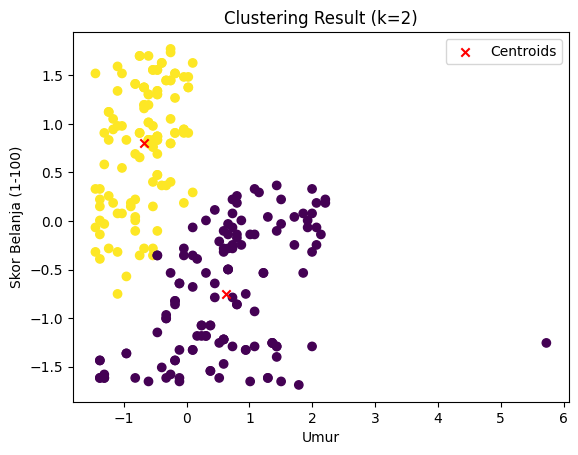

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

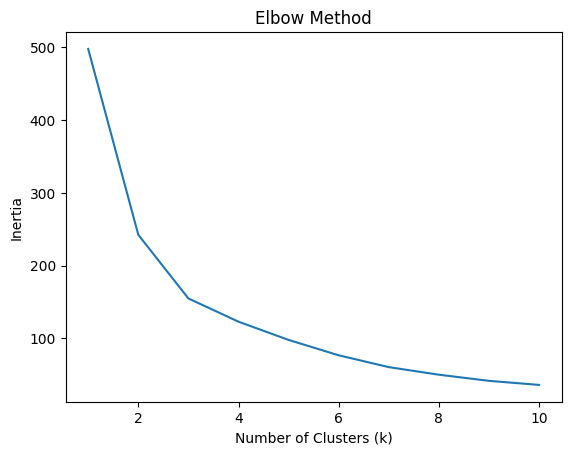

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


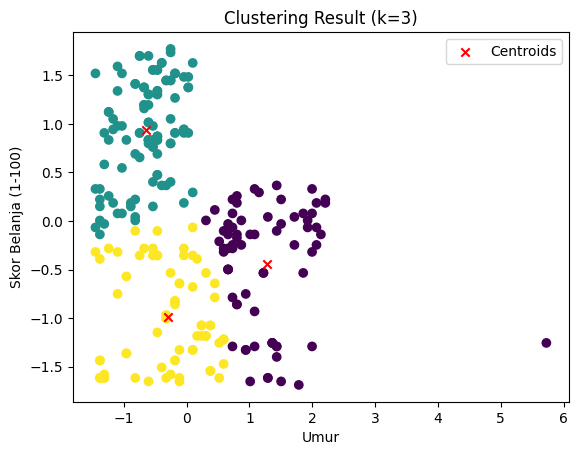

Silhouette Coefficient (k=2): 0.48135116945545364
Silhouette Coefficient (k=3): 0.4652951415351046


In [ ]:
#code here
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

df.describe()
df.fillna(method='ffill', inplace=True)

Q1 = df['Skor Belanja (1-100)'].quantile(0.25)
Q3 = df['Skor Belanja (1-100)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = df[(df['Skor Belanja (1-100)'] >= lower_bound) & (df['Skor Belanja (1-100)'] <= upper_bound)]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Umur', 'Skor Belanja (1-100)']])
scaled_data

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
cluster_labels_k2 = kmeans.labels_
cluster_centers_k2 = kmeans.cluster_centers_

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels_k2)
plt.scatter(cluster_centers_k2[:, 0], cluster_centers_k2[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('Clustering Result (k=2)')
plt.legend()
plt.show()

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
cluster_labels_k3 = kmeans.labels_
cluster_centers_k3 = kmeans.cluster_centers_

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels_k3)
plt.scatter(cluster_centers_k3[:, 0], cluster_centers_k3[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('Clustering Result (k=3)')
plt.legend()
plt.show()


silhouette_score_k2 = silhouette_score(scaled_data, cluster_labels_k2)
silhouette_score_k3 = silhouette_score(scaled_data, cluster_labels_k3)

print("Silhouette Coefficient (k=2):", silhouette_score_k2)
print("Silhouette Coefficient (k=3):", silhouette_score_k3)




Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket.

Jawab disini:
Jika dilihat dari 3 kluster tersebut, yaitu kluster 1 memiliki umur rendah dengan skor belanja rendah, kluster 2 memiliki umur rendah dengan skor belanja tinggi, dan kluster 3 memiliki umur tinggi dengan skor belanja rendah. Dari ketiga kluster ini, kluster 2 memiliki potensi untuk dikembangkan. Dengan melihat data ini bisa diasumsikan menambahkan produk yang sesuai dengan umur pelanggan potensial dapat meningkatkan keuntungan supermarket.